<a href="https://colab.research.google.com/github/ClaudioCaniullan/Machine-Learning-KNN-Aplicaciones/blob/main/KNN_Vecinos_Cercanos_ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**¿Qué librerías necesitamos?**

    -Numpy
    -Matplotlib
    -Pandas
    -SKLEARN
        -sklearn.neighbors import KNeighborsClassifier
        -sklearn.preprocessing import StandardScaler
        -sklearn.metrics import confusion_matrix
    



Podemos resolver problemas de Clasificación y Regresión

**class sklearn.neighbors.KNeighborsRegressor**(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)

**class sklearn.neighbors.KNeighborsClassifier**(n_neighbors=5, , weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, *kwargs)

**n_neighbors** int, predeterminado = 5 Número de vecinos que se utilizarán de forma predeterminada para las consultas de vecinos.

**weights** {"uniforme", "distancia"} o invocables, predeterminado = "uniforme" función de peso utilizada en la predicción. Valores posibles:

    *"Uniforme": pesos uniformes. Todos los puntos de cada vecindario se ponderan por igual.

    *"Distance": puntos de peso por la inversa de su distancia. en este caso, los vecinos más cercanos de un punto de consulta tendrán una mayor influencia que los vecinos más alejados.

[callable] una función definida por el usuario que acepta una matriz de distancias y devuelve una matriz de la misma forma que contiene los pesos.

**algoritmo** {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, predeterminado = ’auto’ Algoritmo utilizado para calcular los vecinos más cercanos:

    *"Ball_tree" utilizará BallTree

    *"Kd_tree" utilizará KDTree

    *"Brute" utilizará una búsqueda de fuerza bruta.

    *"Auto" intentará decidir el algoritmo más apropiado en función de los valores pasados ​​para ajustar el método.

Nota: el ajuste en una entrada escasa anulará la configuración de este parámetro, utilizando la fuerza bruta.

**leaf_size** int, predeterminado = 30

El tamaño de la hoja pasó a BallTree o KDTree. Esto puede afectar la velocidad de construcción y consulta, así como la memoria requerida para almacenar el árbol. El valor óptimo depende de la naturaleza del problema.

**P**  predeterminado = 2 Parámetro de potencia para la métrica de Minkowski. Cuando p = 1, esto es equivalente a usar manhattan_distance (l1) y euclidean_distance (l2) para p = 2. Para p arbitrario, se usa minkowski_distance (l_p).

**metric** str , predeterminado = "minkowski" la métrica de distancia que se utilizará para el árbol. La métrica predeterminada es minkowski y con p = 2 es equivalente a la métrica euclidiana estándar. 

![image.png](attachment:image.png)

**metric_params** predeterminado = None Argumentos de palabras clave adicionales para la función métrica.

**n_jobs** int, predeterminado = None El número de trabajos paralelos que se ejecutarán para la búsqueda de vecinos. Ninguno significa 1 a menos que esté en un contexto joblib.parallel_backend. -1 significa usar todos los procesadores. 

In [4]:
# Importamos librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
#Este archivo tiene información de usuarios que compran o no compran un determinado producto
# Importamos el dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [6]:
dataset.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [7]:
# Dividimos el dataset en training y test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [8]:
# escalamos las variasbles
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [9]:
# Realizando el entrenamiento del dataset con Vecinos Cercanos
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [10]:
# Predicción del set de Test
y_pred = classifier.predict(X_test)

**Matriz de Confusión o Errores**




    •Positivo (P): la observación es positiva 
    •Negativo (N): la observación no es positiva 
    •Verdadero Positivo (TP): Resultado en el que el modelo predice correctamente la clase positiva.
    •Verdadero Negativo (TN): Resultado en el que el modelo predice correctamente la clase negativa.
    •Falso positivo (FP): también llamado error de tipo 1, un resultado en el que el modelo predice incorrectamente la clase positiva cuando en realidad es negativa.
    •Falso negativo (FN): también llamado error de tipo 2, un resultado en el que el modelo predice incorrectamente la clase negativa cuando en realidad es positivo.


In [11]:
# Matriz de Confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [12]:
print(cm) 

[[66  2]
 [ 8 24]]


In [13]:
from sklearn.metrics import accuracy_score
#Exactitud - La exactitud (accuracy) mide el porcentaje de casos que el modelo ha acertado
accuracy_score(y_test, y_pred)

0.9

**Parámetro Average:** string, [None, ‘binary’ (default), ‘micro’, ‘macro’, ‘samples’, ‘weighted’]

Este parámetro es necesario para destinos multiclase / multilabel. Si es None, se devuelven las puntuaciones de cada clase. De lo contrario, esto determina el tipo de promediado realizado en los datos:

'binary':
Informe únicamente los resultados de la clase especificada por pos_label. Esto es aplicable solo si los destinos (y_ {true, pred}) son binarios.

'micro':
Calcula métricas globalmente contando el total de verdaderos positivos, falsos negativos y falsos positivos.

'macro':
Calcula métricas para cada etiqueta y encuentre su media no ponderada. Esto no tiene en cuenta el desequilibrio de etiquetas.

'weighted':
Calcula métricas para cada etiqueta y encuentra su promedio ponderado por soporte (el número de instancias reales para cada etiqueta). Esto altera "macro" para tener en cuenta el desequilibrio de etiquetas; puede resultar en una puntuación F que no se encuentra entre la precisión y el recuerdo.

'samples':
Calcule métricas para cada instancia y encuentre su promedio (solo es significativo para la clasificación de múltiples etiquetas donde esto difiere de precision_score).

In [14]:
# Precision - Con la métrica de precisión podemos medir la calidad del modelo de machine learning en tareas de clasificación.
#Responde a la pregunta ¿qué porcentaje de lo identificado como positivo es realmente correcto?
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='micro')

0.9

In [15]:
# Recall - ¿Qué porcentaje de los valores positivos fueron bien identificados?
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='micro')

0.9

In [16]:
#rendimiento combinado de la precisión y la sensibilidad  
from sklearn.metrics import f1_score 
f1_score(y_test, y_pred, average='micro')

0.9

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


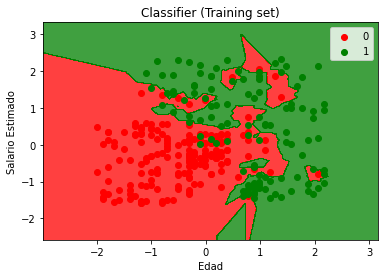

In [17]:
# Visualización del set de training
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


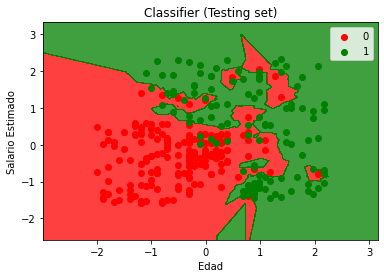

In [18]:
# Visualización del set de Testing
from matplotlib.colors import ListedColormap
X_train, y_train = X_set, y_set
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Testing set)')
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()